In [24]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree, linear_model, neighbors, svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import scikitplot as sckplt

In [2]:
# setting OS directory
os.chdir('C:\\Users\\rckar\\OneDrive\\Documents\\MSBA\\Fall Semester\\6420 Predictive Analytics\\HW2')

In [3]:
# Reading Data
df = pd.read_csv("wdbc.data", header = None)

In [4]:
# Renaming column names
col_names = ['id','diagnosis',
                 'radius_mean','texture_mean','perimeter_mean','area_mean',
                 'smoothness_mean','compactness_mean','concavity_mean',
                 'concave points_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_se','texture_se','perimeter_se','area_se',
                 'smoothness_se','compactness_se','concavity_se','concave points_se',
                 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                 'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

df.columns = col_names

In [5]:
# Data pre-processing

# checking for null values
df.isnull().values.any()

False

In [6]:
# Factorizing diagnosis as diagnosis class for modelling purpose
df['diagnosis_class'],class_names = pd.factorize(df['diagnosis'])
print(class_names)
df[['diagnosis','diagnosis_class']].head(n=2)

Index(['M', 'B'], dtype='object')


,diagnosis,diagnosis_class
0,M,0
1,M,0


In [7]:
# Checking for class imbalance
df['diagnosis_class'].value_counts()

1    357
0    212
Name: diagnosis_class, dtype: int64

In [8]:
X_df = df.iloc[:,2:32]
y_df = df.iloc[:,32:]

In [9]:
X_train, X_test_holdout, y_train, y_test_holdout = train_test_split(X_df, y_df, test_size=0.25)

In [19]:
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_holdout)
print("Accuracy:",accuracy_score(y_test_holdout, y_pred))
print("Precision:",metrics.precision_score(y_test_holdout, y_pred))
print("Recall:",metrics.recall_score(y_test_holdout, y_pred))

Accuracy: 0.958041958041958
Precision: 0.9782608695652174
Recall: 0.9574468085106383


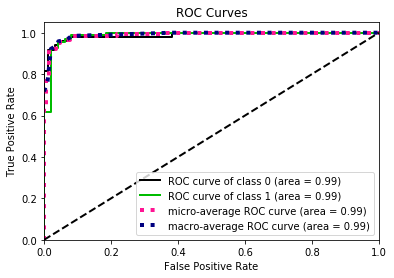

In [27]:
# ground truth labels
y_probas =  clf.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

In [30]:
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_holdout)
print("Accuracy:",accuracy_score(y_test_holdout, y_pred))
print("Precision:",metrics.precision_score(y_test_holdout, y_pred))
print("Recall:",metrics.recall_score(y_test_holdout, y_pred))

Accuracy: 0.6573426573426573
Precision: 0.6573426573426573
Recall: 1.0


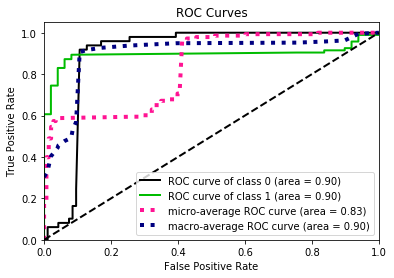

In [31]:
# ground truth labels
y_probas =  clf.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

In [13]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_holdout)
print("Accuracy:",accuracy_score(y_test_holdout, y_pred))
print("Precision:",metrics.precision_score(y_test_holdout, y_pred))
print("Recall:",metrics.recall_score(y_test_holdout, y_pred))

Accuracy: 0.6573426573426573
Precision: 0.6573426573426573
Recall: 1.0


In [37]:
# Hyper parameter tuning using GridSearch
param_set = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_SVC = svm.SVC(probability=True)
grid_SVC = GridSearchCV(clf_SVC, param_grid = param_set, cv=10)
grid_SVC.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# examine the best model

print("Best score achieved across all parameters: ", grid_SVC.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_SVC.best_params_)

print(" ")
print("Best estimator")
print(grid_SVC.best_estimator_)

Best score achieved across all parameters:  0.9577464788732394
 
Best parameters
{'C': 1, 'kernel': 'linear'}
 
Best estimator
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [39]:
clf_SVC_best = grid_SVC.best_estimator_

scores = cross_val_score(clf_SVC_best, X_train, y_train, cv=10)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.95454545 0.93181818 0.95454545 0.95238095 0.97619048 0.95238095
 0.97619048 0.9047619  1.         0.97619048]
 
Mean Accuracy and variance: 0.96 (+/- 0.05)


In [41]:
clf_SVC_best.fit(X_train,y_train)

y_pred = clf_SVC_best.predict(X_test_holdout)
print("SVC : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("SVC : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("SVC : Classification Report")
print(classification_report(y_test_holdout, y_pred))

SVC : accuracy on test data is  95.8 %
 
SVC : Confusion Matrix
 
[[47  2]
 [ 4 90]]
 
SVC : Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.98      0.96      0.97        94

   micro avg       0.96      0.96      0.96       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



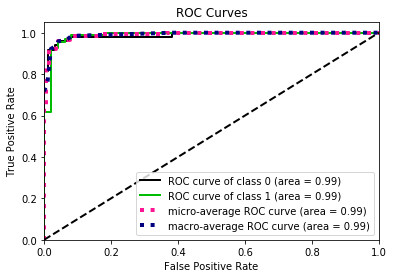

In [42]:
# ground truth labels
y_probas =  clf_SVC_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

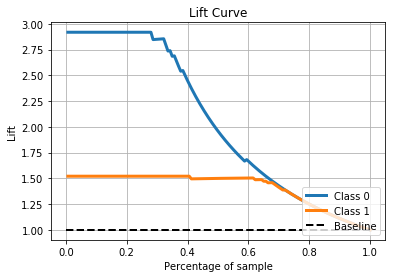

In [44]:
sckplt.metrics.plot_lift_curve(y_test_holdout, y_probas)
plt.show()